In [1]:
# Importing Required Python Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
# Reading the json file
df_login = pd.read_json("logins.json")

In [3]:
df_login.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
# Arranging the dataframe in ascending order by login_time & resetting the index
df_login = (df_login.sort_values(by=['login_time'])).reset_index(drop=True)

In [5]:
df_login.head()

,login_time
0,1970-01-01 20:12:16
1,1970-01-01 20:13:18
2,1970-01-01 20:16:10
3,1970-01-01 20:16:36
4,1970-01-01 20:16:37


In [6]:
# Creating the count column for the df_login & initializing it with 0
df_login['count'] = 0

In [7]:
# Setting the login_time as the dataframe's index
df_login = df_login.set_index('login_time')

In [8]:
df_login.head()

,count
login_time,
1970-01-01 20:12:16,0
1970-01-01 20:13:18,0
1970-01-01 20:16:10,0
1970-01-01 20:16:36,0
1970-01-01 20:16:37,0


In [9]:
# Counting the no. of logins in each 15 minutes period
df_login_count = df_login.resample('15T').count()

In [10]:
df_login_count.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [11]:
from datetime import datetime as dt

In [12]:
# Creating Day & Hour columns for the login dataframe in order to have more info.
df_login_count['Day'] = df_login_count.index.day_name()
df_login_count['Hour'] = df_login_count.index.hour

In [13]:
df_login_count.head()

,count,Day,Hour
login_time,,,
1970-01-01 20:00:00,2,Thursday,20
1970-01-01 20:15:00,6,Thursday,20
1970-01-01 20:30:00,9,Thursday,20
1970-01-01 20:45:00,7,Thursday,20
1970-01-01 21:00:00,1,Thursday,21


In [14]:
# Grouping the count column of the dataframe by Day of the week.
df_day = df_login_count.groupby('Day')['count'].sum()

In [15]:
# Converting the series back to the dataframe
df_day = df_day.reset_index()

In [16]:
d = {'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}
df_day['day of the week'] = df_day['Day'].map(d)

In [17]:
df_day.head()

,Day,count,day of the week
0,Friday,15208,5
1,Monday,8823,1
2,Saturday,19377,6
3,Sunday,18167,7
4,Thursday,11960,4


In [18]:
# Sorting the dataframe df_day by 'day of the week' column
df_day = df_day.sort_values(by='day of the week')

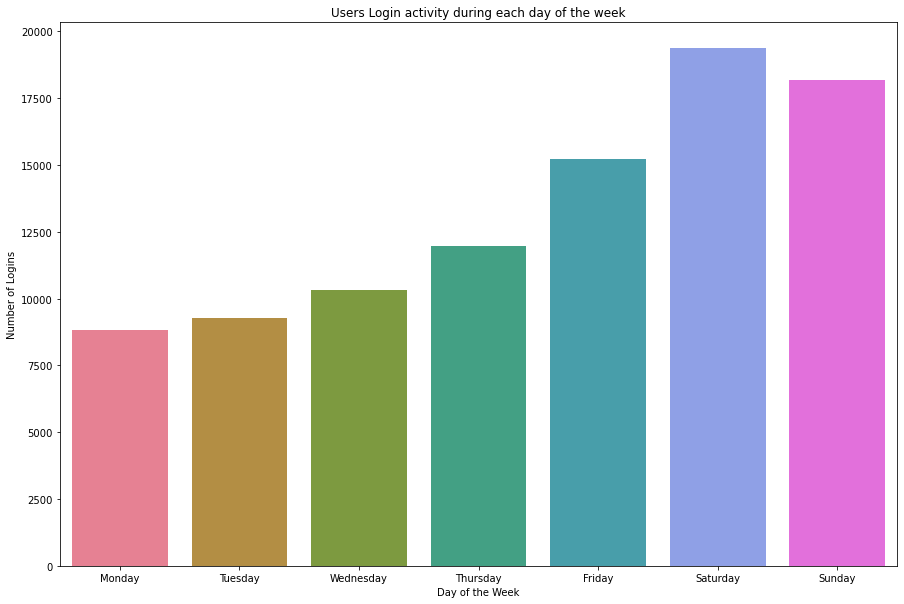

In [19]:
# plotting the total no. of logins on each day of the week during the study period.
plt.figure(figsize=(15,10))
sns.barplot(x='Day',y='count',data=df_day,palette="husl")
plt.xlabel('Day of the Week')
plt.ylabel('Number of Logins')
plt.title('Users Login activity during each day of the week')
plt.show()

### As can be clearly observed from the above diagram , total no. of users logins on each day of the week,  increased monotonically into the weekends with a slight dip on the sundays, during the study period.

In [20]:
# Grouping the count column of the dataframe by the hour of the week.
df_Hour = df_login_count.groupby('Hour')['count'].sum()

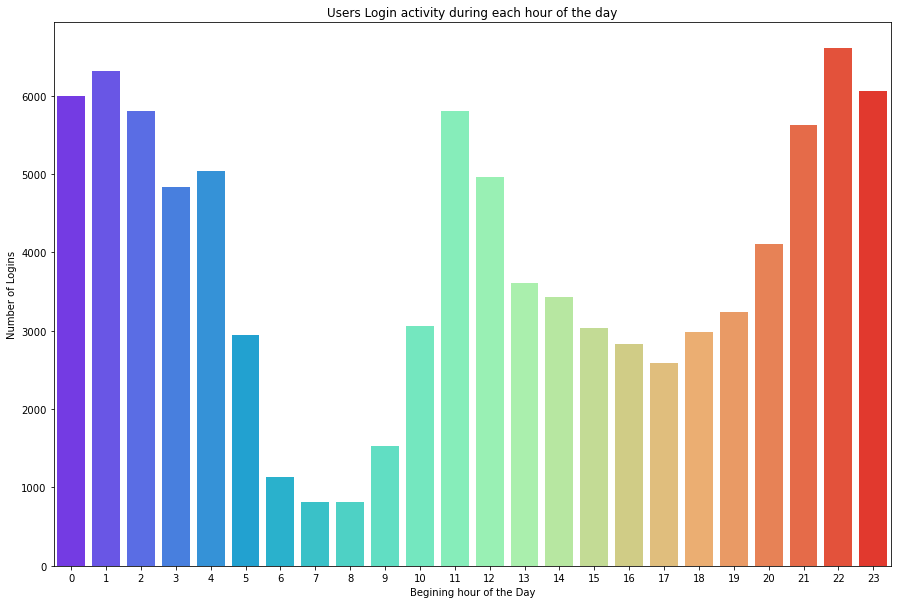

In [21]:
# Plotting the Total no. of logins for each hour duration(with hour indicating the begining hour)during the study period
plt.figure(figsize=(15,10))
sns.barplot(x=df_Hour.index,y=df_Hour,palette='rainbow')
plt.xlabel('Begining hour of the Day')
plt.ylabel('Number of Logins')
plt.title('Users Login activity during each hour of the day')
plt.show()

### As can be clearly observed from the above diagram , total no. of users logins during each hour of the day,  are high during the mid day, evening & night during the study period. Thus most of the user logins are during lunch or night-time outings.

### Computing average logins for each hour, for each day of the week.

In [22]:
# Creating day number of the week column in df_login_count
df_login_count['day of the week'] = df_login_count['Day'].map(d)

In [23]:
df_login_count.head()

,count,Day,Hour,day of the week
login_time,,,,
1970-01-01 20:00:00,2,Thursday,20,4
1970-01-01 20:15:00,6,Thursday,20,4
1970-01-01 20:30:00,9,Thursday,20,4
1970-01-01 20:45:00,7,Thursday,20,4
1970-01-01 21:00:00,1,Thursday,21,4


In [24]:
df_avg_day = df_login_count.groupby(['Day','Hour'],as_index=False)['count'].mean()

In [25]:
df_avg_day

,Day,Hour,count
0,Friday,0,16.250000
1,Friday,1,15.950000
2,Friday,2,12.850000
3,Friday,3,8.366667
4,Friday,4,5.883333
...,...,...,...
163,Wednesday,19,5.464286
164,Wednesday,20,8.928571
165,Wednesday,21,13.196429
166,Wednesday,22,15.803571


In [26]:
# Defining the order of the days of the week
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

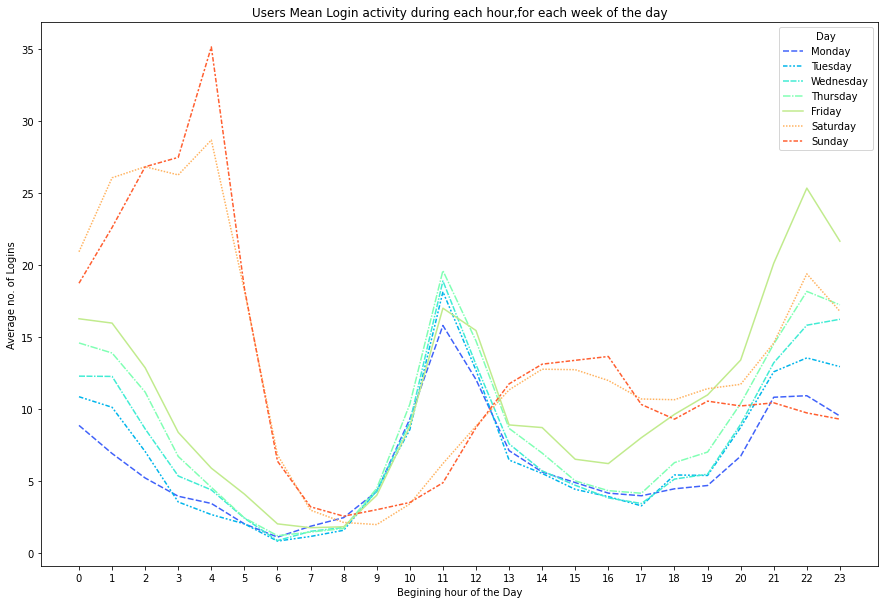

In [27]:
# Plotting the Total no. of logins for each hour duration(with hour indicating the begining hour)during the study period
plt.figure(figsize=(15,10))
sns.lineplot(x='Hour',y='count',hue='Day',data=df_avg_day,palette='rainbow',hue_order=order,style='Day')
plt.xticks(range(0,24))
plt.xlabel('Begining hour of the Day')
plt.ylabel('Average no. of Logins')
plt.title('Users Mean Login activity during each hour,for each week of the day')
plt.show()

### The above plot again substantiates the fact that night times are particularly busy on Friday & Saturday nights and mid-day times, around lunch hour, are particularly busy on weekdays , which make sense.

### 2: Experiment and metrics design

### 3: Predictive Modeling

In [28]:
# Reading in the dataset
df_trips = pd.read_json('ultimate_data_challenge.json', convert_dates=['signup_date','last_trip_date'], keep_default_dates=True)

In [29]:
# Viewing its head
df_trips.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [31]:
# Getting the info of the dataframe.
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [32]:
# Getting the max of the last trip date column of the dataset
df_trips['last_trip_date'].max()

Timestamp('2014-07-01 00:00:00')

###  Creating the active=1/ non_active=0 column in the dataset.

### Since the last trip date is 1st july 2014,  any customer whose last trip datetime was earlier than  '2014-06-01 00:00:00' is considered as inactive and any customer whose last trip datetime was at or later than  '2014-06-01 00:00:00' is considered active.

In [33]:
cutoff = dt(2014,6,1,0,0,0)

In [34]:
# Defining the lambda function to determine the active status of the users:  0 for non_active & 1 for active
s = map(lambda x : 0 if  x < cutoff else 1,(df_trips['last_trip_date']))                                               

In [35]:
df_trips['Status_Active'] = pd.Series(s,index=df_trips.index)

In [36]:
df_trips.head(10)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Status_Active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0,1
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0,0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0,0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0,0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0,0


## EDA of the dataset

In [37]:
# Checking for the missing values
df_trips.isna().mean()*100

city                       0.000
trips_in_first_30_days     0.000
signup_date                0.000
avg_rating_of_driver      16.244
avg_surge                  0.000
last_trip_date             0.000
phone                      0.792
surge_pct                  0.000
ultimate_black_user        0.000
weekday_pct                0.000
avg_dist                   0.000
avg_rating_by_driver       0.402
Status_Active              0.000
dtype: float64

### From the above output it is clear that around 16% of the missing values are present in the avg_rating_of_driver col & around .8%  & .4% of missing values are present in the phone and avg_rating_by_driver columns respectively.

### Analyzing Missing Values in the dataset.

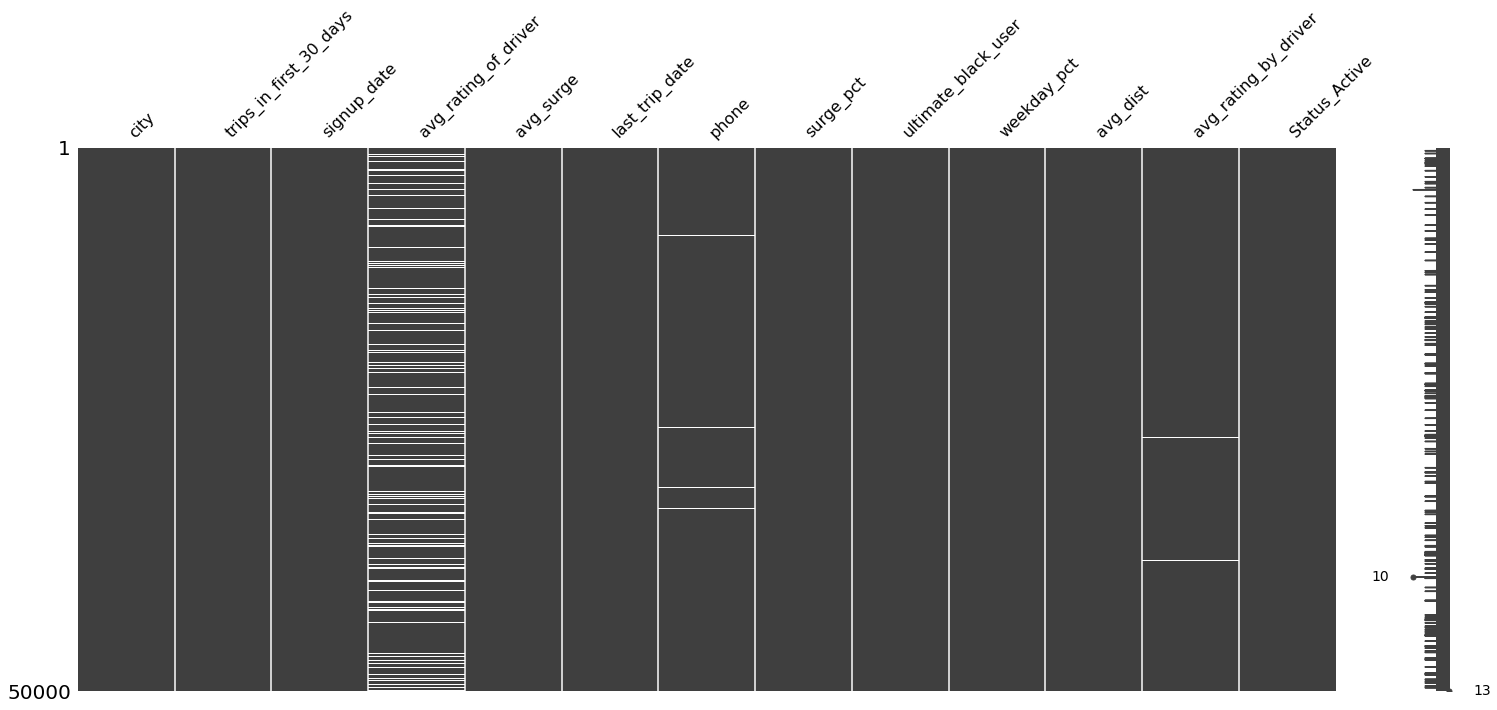

In [38]:
# Analyzing the missing Values in various columns of the dataset
import missingno as msno
msno.matrix(df_trips)
plt.show()

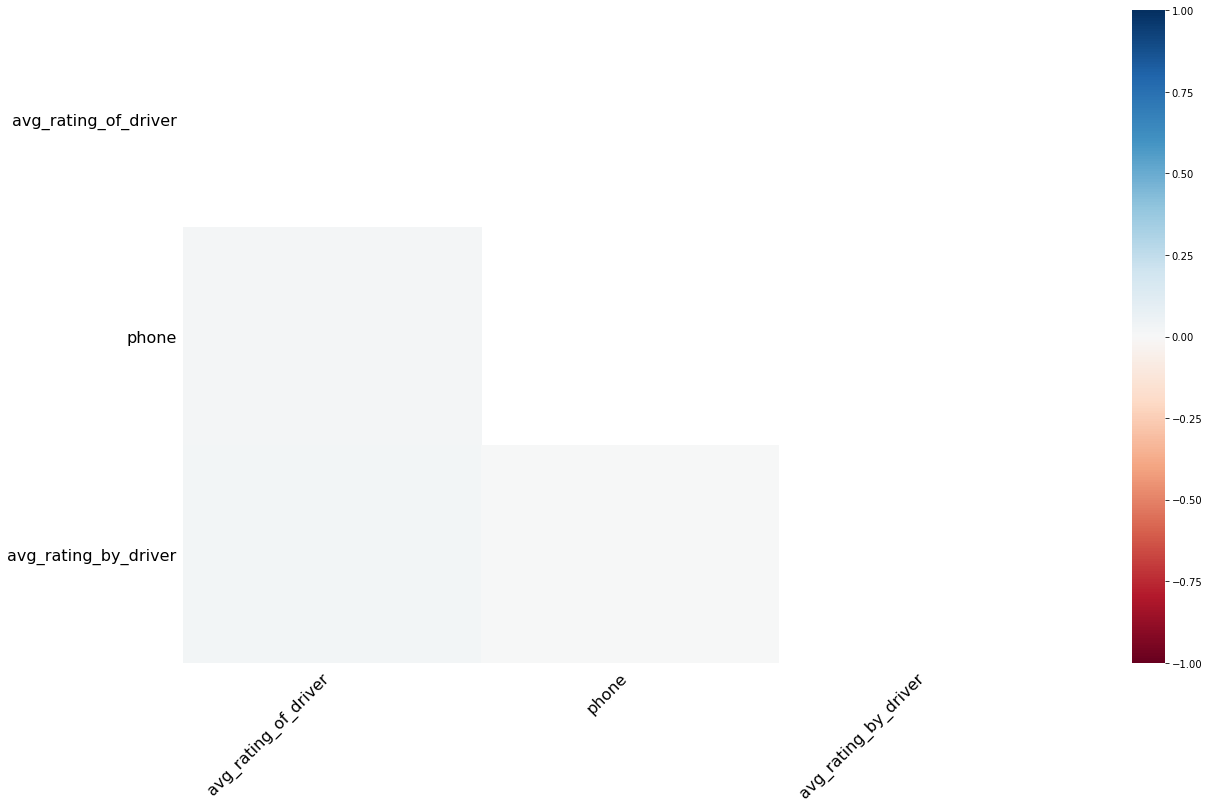

In [39]:
# Visualizing the heatmap of the correlations of the missing values
msno.heatmap(df_trips)
plt.show()

### From the above graphs, it is clear that most of the missing values are present in the avg_rating_of_driver column as pointed out earlier. Further there appears to be no correlation between missing values in various columns. Thus values are Missing Completely at Random (MCAR).

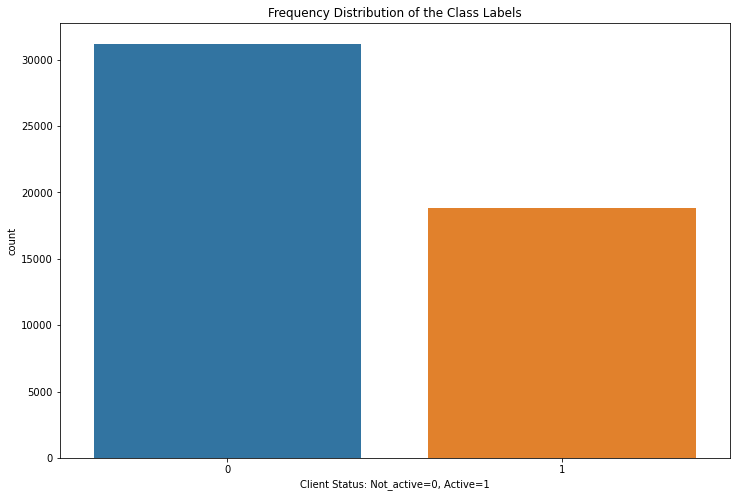

In [40]:
# Checking for the class ratios of the two classes.
# Plotting the Response variable y
plt.figure(figsize=(12,8))
sns.countplot(x='Status_Active',data=df_trips)
plt.xlabel('Client Status: Not_active=0, Active=1')
plt.title('Frequency Distribution of the Class Labels')
plt.show()

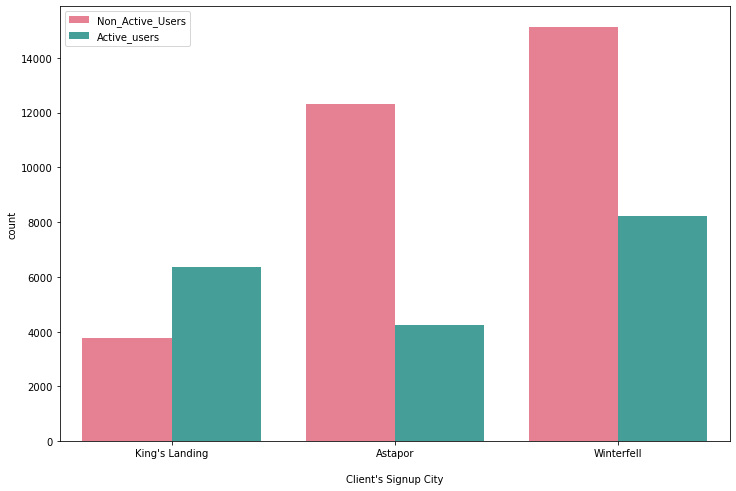

In [41]:
plt.figure(figsize=(12,8))
sns.countplot(x='city', hue = 'Status_Active', data=df_trips, palette="husl")
plt.xlabel('\nClient\'s Signup City')
plt.legend(['Non_Active_Users','Active_users'])# 1st & 2nd Entry in legend correspond to y=0 & y=1 respectively
plt.show()

### From the above graph, it is clear that king's landing has more active users than the non_active ones,  while Winterfell has the next best ratio for active_users/non_active users. The company should introspect the reason behind the really bad performance in the city of Astapor and take appropriate remedial measures.

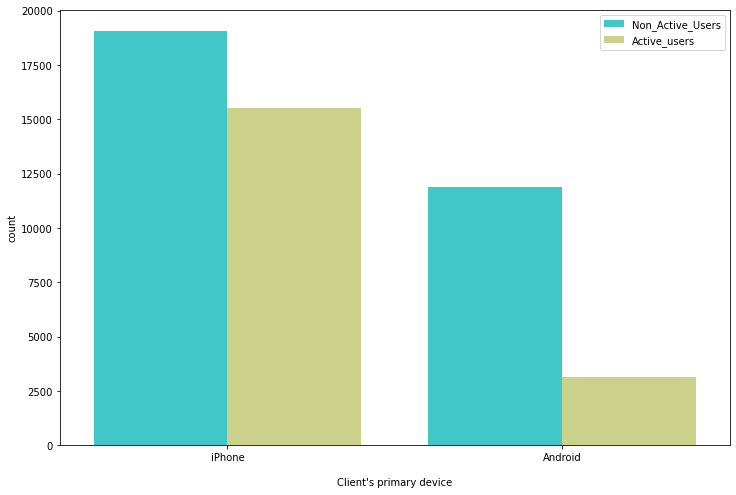

In [42]:
plt.figure(figsize=(12,8))
sns.countplot(x='phone', hue = 'Status_Active', data=df_trips, palette="rainbow")
plt.xlabel('\nClient\'s primary device')
plt.legend(['Non_Active_Users','Active_users'])# 1st & 2nd Entry in legend correspond to y=0 & y=1 respectively
plt.show()

### The above graph indicates that iphone users tend to be substantially more active riders than the Android ones.

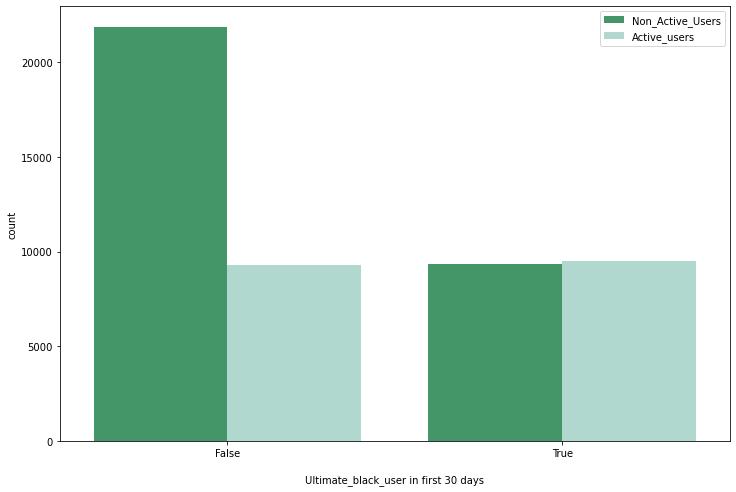

In [43]:
plt.figure(figsize=(12,8))
sns.countplot(x='ultimate_black_user', hue = 'Status_Active', data=df_trips, palette="BuGn_r")
plt.xlabel('\nUltimate_black_user in first 30 days')
plt.legend(['Non_Active_Users','Active_users'])# 1st & 2nd Entry in legend correspond to y=0 & y=1 respectively
plt.show()

### From the above graph it is clear that higher % of customers who used Ultimate Black in their first 30 days are still active customers.

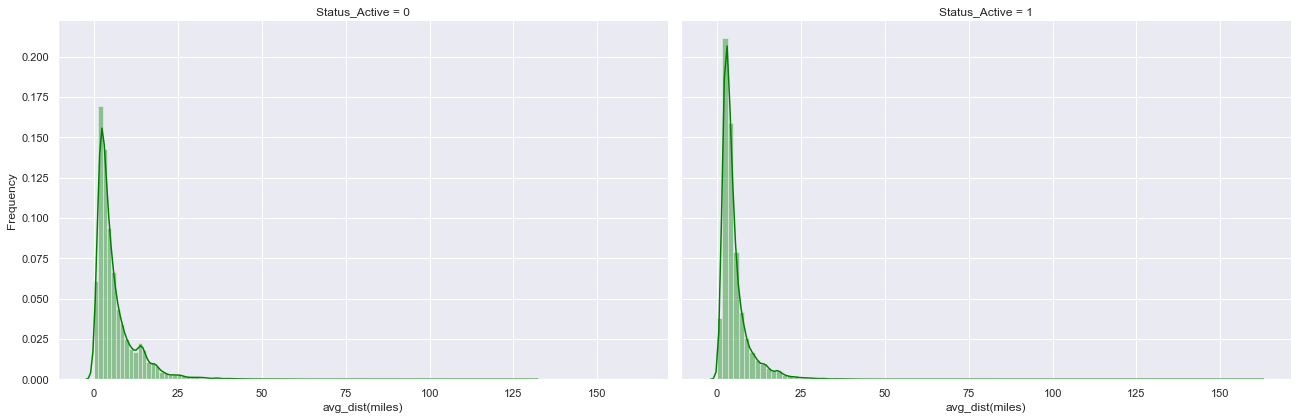

In [44]:
# plotting the histogram of avg_distance travelled in the first 30 days for both classes y=0 & y=1
sns.set(rc={'figure.figsize':(15,10)})
g = sns.FacetGrid(df_trips, col='Status_Active',aspect=1.5,height=6)
g.map(sns.distplot,'avg_dist', bins=100,color='green')
g.set_axis_labels('avg_dist(miles)', 'Frequency')
plt.show()

### From the above graphs it is clear that there not much of difference between active & non_active users in terms of  avg_distance traveled in their first 30 days. Although surprinsly on an average, non_active users do tend to travel slightly more in their first 30 days.

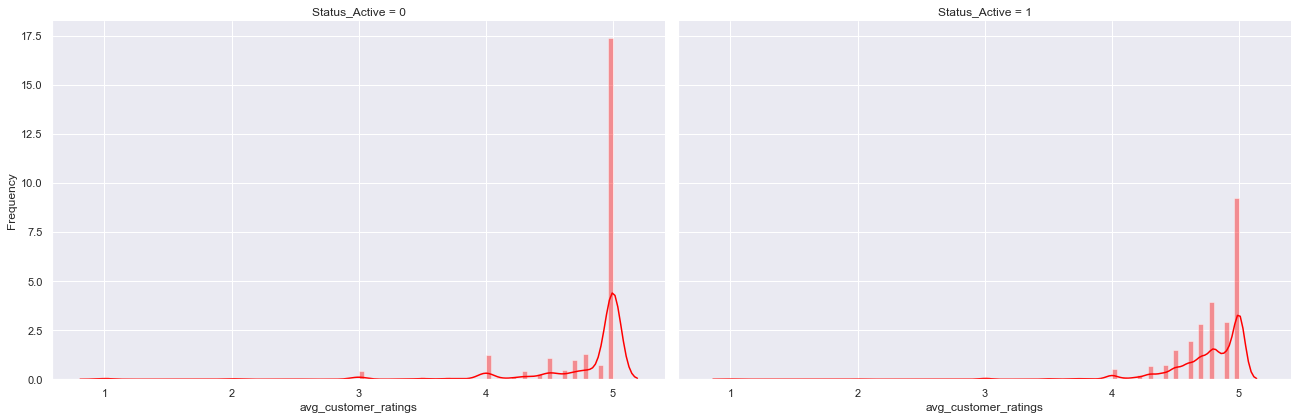

In [45]:
# plotting the histogram of avg_rating_by_driver for both classes y=0 & y=1
sns.set(rc={'figure.figsize':(15,10)})
g = sns.FacetGrid(df_trips, col='Status_Active',aspect=1.5,height=6)
g.map(sns.distplot,'avg_rating_by_driver', bins=100,color='red')
g.set_axis_labels('avg_customer_ratings', 'Frequency')
plt.show()

### From the above figure, as anticipated, the avg_customer_ratings, in the interval [4.0-5.0] are more for  the active customers than the non_active ones. Although a higher % of non_active customers enjoy 5 star ratings.

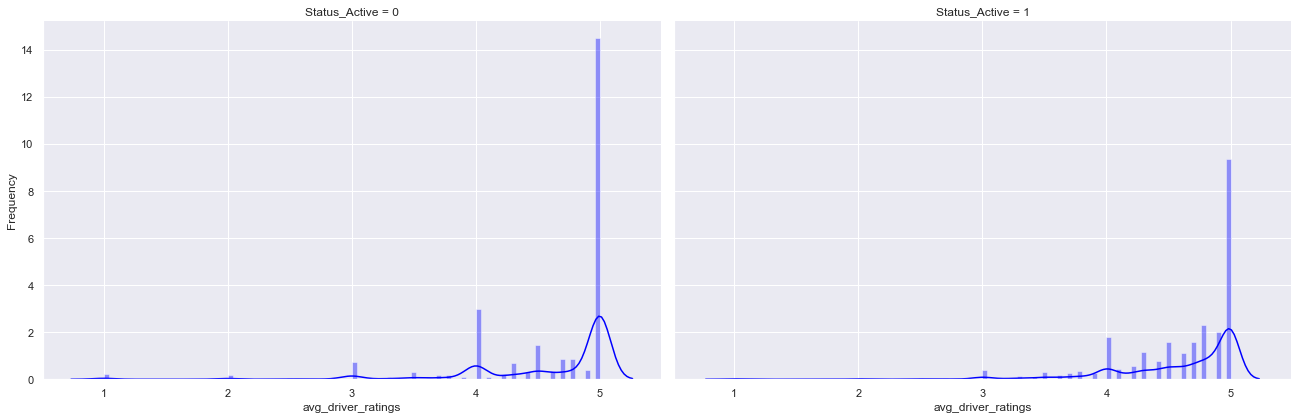

In [46]:
# plotting the histogram of avg_rating_of_driver for both classes y=0 & y=1
sns.set(rc={'figure.figsize':(15,10)})
g = sns.FacetGrid(df_trips, col='Status_Active',aspect=1.5,height=6)
g.map(sns.distplot,'avg_rating_of_driver', bins=100,color='blue')
g.set_axis_labels('avg_driver_ratings', 'Frequency')
plt.show()

### From the above graph, on an average, the active users tend to give higher ratings to the drivers.

In [47]:
# Removing noisy features sign_up date & last trip date from the dataset
df_trips.drop(columns=['signup_date','last_trip_date'], inplace=True)

In [48]:
# Converting the boolean column into an int column
df_trips['ultimate_black_user'] = df_trips['ultimate_black_user'].astype(np.int8)

### Splitting the dataset into Training & Test set.

In [49]:
# Segregating the Feature space from the response variable.
X = df_trips.drop(columns='Status_Active')
y = df_trips['Status_Active']

In [50]:
# Importing the train test split module from Sklearn
from sklearn.model_selection import train_test_split

In [51]:
# Performing Train Test split using sklearn . Here the split is stratified using the class labels
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size =.2,stratify=y)

### Taking care of missing values in the column avg_rating_of_driver & avg_rating_by_driver

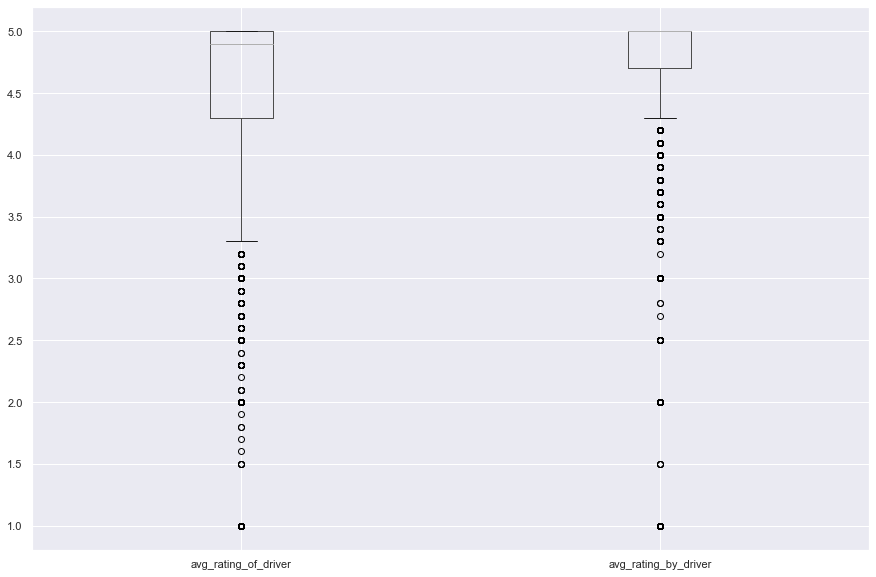

In [52]:
# plotting the boxplot for this column of training set
X_train.boxplot(column = ['avg_rating_of_driver','avg_rating_by_driver'],figsize=(15,10))
plt.show()

####  Tackling missing values in avg_rating_of_driver by filling the missing values by their corresponding class means.

In [53]:
# Defining the function to fill in the missing values
def fill_na(s):
    return s.fillna(s.mean())

In [54]:
# Filling in the missing values in avg_rating_of_driver column by class means
X_train['avg_rating_of_driver'] = X_train.groupby(y_train)['avg_rating_of_driver'].transform(fill_na)

In [55]:
X_train['avg_rating_of_driver'].isna().sum()

0

In [56]:
# Getting the training set class means for filling in missing values of the test set.
class_mean = X_train.groupby(y_train)['avg_rating_of_driver'].mean()

In [57]:
class_mean

Status_Active
0    4.609462
1    4.590866
Name: avg_rating_of_driver, dtype: float64

In [58]:
# Imputing the test set missing values by corresponding training set class means.
for i in range(len(class_mean)):
    s = X_test.groupby(y_test)['avg_rating_of_driver'].get_group(i).fillna(class_mean[i])
    X_test['avg_rating_of_driver'].loc[s.index] = s

In [59]:
 X_test['avg_rating_of_driver'].isna().sum()

0

####  Tackling missing values in avg_rating_by_driver by filling the missing values by their corresponding class means.

In [60]:
# Filling in the missing values in avg_rating_of_driver column by class means
X_train['avg_rating_by_driver'] = X_train.groupby(y_train)['avg_rating_by_driver'].transform(fill_na)

In [61]:
X_train['avg_rating_by_driver'].isna().sum()

0

In [62]:
# Getting the training set class means for filling in missing values of the test set.
class_mean = X_train.groupby(y_train)['avg_rating_by_driver'].mean()

In [63]:
# Imputing the test set missing values by corresponding training set class means.
for i in range(len(class_mean)):
    s = X_test.groupby(y_test)['avg_rating_by_driver'].get_group(i).fillna(class_mean[i])
    X_test['avg_rating_by_driver'].loc[s.index] = s

In [64]:
 X_test['avg_rating_by_driver'].isna().sum()

0

####  Tackling missing values in categorical columns by converting them to dummies and removing any NaN column.

In [65]:
# Converting object columns to dummies in training set and getting rid of city_astapor column to maintain linear independence.
X_train = pd.get_dummies(X_train)

In [67]:
# Removing 'city_Astapor' column to remove linear dependence among the features 
X_train.drop(columns='city_Astapor',inplace=True)

In [68]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 40147 to 23510
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  40000 non-null  int64  
 1   avg_rating_of_driver    40000 non-null  float64
 2   avg_surge               40000 non-null  float64
 3   surge_pct               40000 non-null  float64
 4   ultimate_black_user     40000 non-null  int8   
 5   weekday_pct             40000 non-null  float64
 6   avg_dist                40000 non-null  float64
 7   avg_rating_by_driver    40000 non-null  float64
 8   city_King's Landing     40000 non-null  uint8  
 9   city_Winterfell         40000 non-null  uint8  
 10  phone_Android           40000 non-null  uint8  
 11  phone_iPhone            40000 non-null  uint8  
dtypes: float64(6), int64(1), int8(1), uint8(4)
memory usage: 2.6 MB


In [69]:
# Converting object columns to dummies in test set and getting rid of city_astapor column to maintain linear independence.
X_test = pd.get_dummies(X_test)

In [70]:
X_test.drop(columns='city_Astapor',inplace=True)

In [71]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1138 to 17808
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  10000 non-null  int64  
 1   avg_rating_of_driver    10000 non-null  float64
 2   avg_surge               10000 non-null  float64
 3   surge_pct               10000 non-null  float64
 4   ultimate_black_user     10000 non-null  int8   
 5   weekday_pct             10000 non-null  float64
 6   avg_dist                10000 non-null  float64
 7   avg_rating_by_driver    10000 non-null  float64
 8   city_King's Landing     10000 non-null  uint8  
 9   city_Winterfell         10000 non-null  uint8  
 10  phone_Android           10000 non-null  uint8  
 11  phone_iPhone            10000 non-null  uint8  
dtypes: float64(6), int64(1), int8(1), uint8(4)
memory usage: 931.9 KB


### Saving the training set & test sets as Dataframes.

In [72]:
X_train.to_csv('X_train.csv',index=False)
X_test.to_csv('X_test.csv',index=False)
y_train.to_csv('y_train.csv',index=False)
y_test.to_csv('y_test.csv',index=False)

In [73]:
y_train.value_counts()

0    24957
1    15043
Name: Status_Active, dtype: int64